In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from __future__ import print_function
import torch
from torch import autograd
from torch.autograd import Variable
import torch.nn.functional as F
from IPython.display import clear_output
import time

images = np.load('images.npy')
labels = np.load('labels.npy')
num_images,height,width = np.shape(images)
images = images.astype(float)
images = np.reshape(images,(num_images,height*width))/255.0
np.shape(images)
print(num_images)

labels = labels.astype(int)
print(labels)


x_valid = images[45000:50000][:]
#print(np.shape(x_valid))
y_valid = labels[45000:50000]
#print(np.shape(y_valid))

x_train = images[0:45000][:]
#print(np.shape(x_train))
y_train = labels[0:45000]
#print(np.shape(y_train))


train_seqs = x_train
train_labels = y_train

val_seqs = x_valid
val_labels = y_valid
#x = images
#labels = labels
#print(np.shape(x))
#print(np.shape(y))

#constants
HEIGHT = np.shape(train_seqs)[1]
WIDTH = 1
max_count = np.bincount(train_labels)
NUM_CLASSES = np.size(max_count)
NUM_EXAMPLES = np.shape(train_seqs)[0]

50000
[4 0 0 ..., 3 4 3]


Random classifier would have an accuracy of 20%. As you can see, each class actually has the same no of labels, meaning accuracy  = 1/5*100 = 20%

In [2]:
#linear model
class LinearModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = torch.nn.Linear(HEIGHT*WIDTH, NUM_CLASSES)
    def forward(self, x):
        x = self.linear(x)
        return x

No of weights = No of features in the training set = HEIGHT*WIDTH. Since we havent explicitly set "bias=True" in the torch.nn.Linear module, there is no additive bias. i.e no of additive biases = 0

In [3]:
model = LinearModel()

In the previous homeworks, we implemented the following 2 optimization algorithms:
1. SGD : Need to provide parameters of the model (params), learning rate(lr)
2. ADAM: Need to provide parameters of the model (params), learning rate (lr)

In [4]:
optimizer = torch.optim.SGD(model.parameters(), lr=1e-4)

In [5]:
def train(batch_size):
    #model.train() puts our model in train mode, which can require different behaviour than eval mode (for example
    #in the case of dropout
    #model.train()
    #i is a 1 dimensional array with shape[batch_size]
    i = np.random.choice(train_seqs.shape[0], size=batch_size, replace=False)
    x = autograd.Variable(torch.from_numpy(train_seqs[i].astype(np.float32)))
    y = autograd.Variable(torch.from_numpy(train_labels[i].astype(np.int)))
    optimizer.zero_grad()
    y_hat_ = model(x)
    loss = F.cross_entropy(y_hat_, y)
    loss.backward()
    optimizer.step()
    return loss.data[0]

In [6]:
def approx_train_accuracy():
    i = np.random.choice(train_seqs.shape[0], size=1000, replace=False)
    x = autograd.Variable(torch.from_numpy(train_seqs[i].astype(np.float32)))
    y = autograd.Variable(torch.from_numpy(train_labels[i].astype(np.float32)))
    y_hat_ = model(x)
    temp,y_hat = torch.max(y_hat_,1)
    return accuracy(y,y_hat)
    

In [7]:
def approx_val_accuracy():
    i = np.random.choice(train_seqs.shape[0], size=1000, replace=False)
    x = autograd.Variable(torch.from_numpy(val_seqs.astype(np.float32)))
    y = autograd.Variable(torch.from_numpy(val_labels.astype(np.float32)))
    y_hat_ = model(x)
    temp,y_hat = torch.max(y_hat_,1)
    return accuracy(y,y_hat)
    

In [8]:
def accuracy(y,y_hat):
    correct = np.count_nonzero(y_hat.data.numpy()==y.data.numpy())
    return correct/y.data.shape[0]

In [9]:
for m in model.children():
    m.reset_parameters()

NUM_OPT_STEPS = 5000
batch_size = 1;


t = time.time()

train_accs, val_accs =[], []
for i in range(NUM_OPT_STEPS):
    loss = train(batch_size)
    if i%100==0:
        train_accs.append(approx_train_accuracy())
        val_accs.append(approx_val_accuracy())
        print("%6d %5.2f %5.2f"%(i,train_accs[-1]*100,val_accs[-1]*100))
        
elapsed = time.time() - t
print('Total training time approx. =',elapsed,'secs')

     0 21.60 20.70
   100 23.00 21.58
   200 22.20 23.00
   300 25.10 24.32
   400 24.70 26.22
   500 27.90 27.72
   600 30.40 30.00
   700 32.30 30.54
   800 33.50 31.86
   900 32.80 33.06
  1000 34.20 34.06
  1100 34.60 36.76
  1200 38.30 40.78
  1300 41.70 42.20
  1400 41.90 44.40
  1500 44.70 45.56
  1600 47.50 45.74
  1700 45.50 47.42
  1800 46.90 48.12
  1900 49.30 49.52
  2000 49.70 49.90
  2100 54.00 51.10
  2200 50.00 51.34
  2300 52.60 51.68
  2400 48.40 52.64
  2500 52.70 52.96
  2600 55.00 53.96
  2700 52.50 54.42
  2800 53.90 54.84
  2900 54.10 54.60
  3000 55.70 55.46
  3100 55.60 55.22
  3200 55.60 56.14
  3300 56.30 56.32
  3400 60.70 57.18
  3500 57.70 57.12
  3600 55.20 56.76
  3700 59.00 56.70
  3800 55.90 56.38
  3900 55.40 56.36
  4000 53.00 57.40
  4100 53.80 57.48
  4200 58.80 58.78
  4300 56.10 58.88
  4400 54.50 58.94
  4500 59.60 59.56
  4600 60.10 59.68
  4700 58.00 59.78
  4800 58.90 60.50
  4900 57.60 60.14
Total training time approx. = 11.16114091873169 se

average accuracy =  0.4717


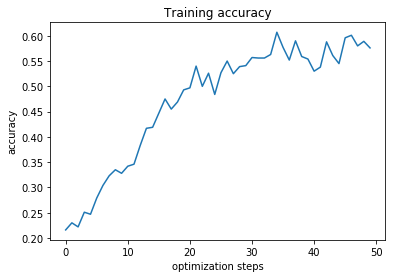

In [10]:
plt.plot(train_accs)
plt.title('Training accuracy')
plt.ylabel('accuracy')
plt.xlabel('optimization steps')
print('average accuracy = ',np.mean(train_accs))

average accuracy =  0.477156


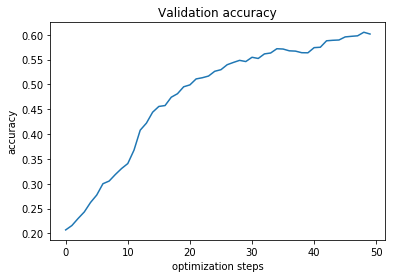

In [11]:
plt.plot(val_accs)
plt.title('Validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('optimization steps')
print('average accuracy = ',np.mean(val_accs))

Top train accuracy = 62.10% Top Validation accuracy = 60.94%

Problem: using too low learning rate, batch_size and step stize. Need to fine tune these parameters to fit the model better

In [25]:
#fine tuning the parameters
#constants
HEIGHT = np.shape(train_seqs)[1]
WIDTH = 1
max_count = np.bincount(train_labels)
NUM_CLASSES = np.size(max_count)
NUM_EXAMPLES = np.shape(train_seqs)[0]
NUM_OPT_STEPS = 10000
batch_size = 1;

In [26]:
#reset parameters
for m in model.children():
    m.reset_parameters()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [27]:
t = time.time()
train_accs, val_accs =[], []
for i in range(NUM_OPT_STEPS):
    loss = train(batch_size)
    if i%100==0:
        train_accs.append(approx_train_accuracy())
        val_accs.append(approx_val_accuracy())
        print("%6d %5.2f %5.2f"%(i,train_accs[-1]*100,val_accs[-1]*100))
        
elapsed = time.time() - t
print('Total training time approx. =',elapsed,'secs')

     0 23.60 21.62
   100 52.50 54.28
   200 60.40 62.32
   300 61.80 64.76
   400 64.90 67.60
   500 67.30 67.92
   600 66.70 67.60
   700 65.60 69.54
   800 67.40 70.52
   900 69.20 70.22
  1000 73.10 71.88
  1100 69.60 70.26
  1200 66.30 67.92
  1300 71.30 68.84
  1400 71.40 73.12
  1500 70.20 72.64
  1600 72.00 74.16
  1700 71.20 72.84
  1800 74.00 74.32
  1900 71.00 72.58
  2000 71.60 73.44
  2100 73.10 72.10
  2200 71.70 72.76
  2300 72.20 74.02
  2400 76.80 74.62
  2500 72.00 73.94
  2600 74.50 73.24
  2700 67.30 70.04
  2800 76.20 75.40
  2900 71.60 71.02
  3000 73.20 74.14
  3100 71.20 73.88
  3200 69.60 72.66
  3300 73.30 73.62
  3400 74.40 75.26
  3500 68.50 70.52
  3600 75.00 74.70
  3700 73.00 72.56
  3800 72.10 75.14
  3900 71.30 73.92
  4000 75.10 75.14
  4100 71.20 75.08
  4200 74.30 75.54
  4300 70.00 74.22
  4400 73.20 74.04
  4500 71.20 74.10
  4600 74.10 74.30
  4700 72.60 75.16
  4800 72.30 75.44
  4900 75.00 75.38
  5000 74.10 76.42
  5100 73.90 74.16
  5200 74.40

average accuracy =  0.71845


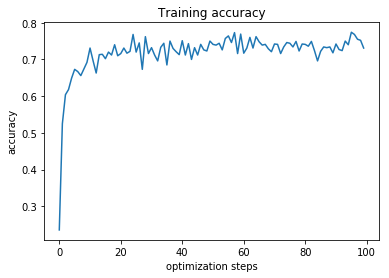

In [28]:
plt.plot(train_accs)
plt.title('Training accuracy')
plt.ylabel('accuracy')
plt.xlabel('optimization steps')
print('average accuracy = ',np.mean(train_accs))

average accuracy =  0.73012


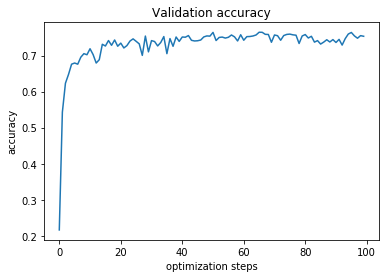

In [29]:
plt.plot(val_accs)
plt.title('Validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('optimization steps')
print('average accuracy = ',np.mean(val_accs))

In [30]:
print('Max training accuracy=',np.max(train_accs), 'for',NUM_OPT_STEPS ,'optimization steps')
print('Max validation accuracy=',np.max(val_accs), 'for',NUM_OPT_STEPS, 'optimization steps')
print('batch_size=',batch_size)
print('Learning rate=',1e-3)
print('optimizer = Adam')
print('Total training time approx. =',elapsed,'secs')

Max training accuracy= 0.774 for 10000 optimization steps
Max validation accuracy= 0.7646 for 10000 optimization steps
batch_size= 1
Learning rate= 0.001
optimizer = Adam
Total training time approx. = 27.80029797554016 secs
